<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-предварительный-анализ-данных" data-toc-modified-id="Загрузка-и-предварительный-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и предварительный анализ данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Использование-при-обучении-параметра-(class_weight='balanced')" data-toc-modified-id="Использование-при-обучении-параметра-(class_weight='balanced')-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Использование при обучении параметра (class_weight='balanced')</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**   
**Признаки**  
•	RowNumber — индекс строки в данных  
•	CustomerId — уникальный идентификатор клиента  
•	Surname — фамилия  
•	CreditScore — кредитный рейтинг  
•	Geography — страна проживания  
•	Gender — пол  
•	Age — возраст  
•	Tenure — сколько лет человек является клиентом банка  
•	Balance — баланс на счёте  
•	NumOfProducts — количество продуктов банка, используемых клиентом  
•	HasCrCard — наличие кредитной карты  
•	IsActiveMember — активность клиента  
•	EstimatedSalary — предполагаемая зарплата  
**Целевой признак**  
•	Exited — факт ухода клиент  

## Подготовка данных

### Загрузка и предварительный анализ данных

In [1]:
#подключение библиотек, используемых в проекте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.utils import shuffle
from tqdm import tqdm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('datasets\\Churn.csv')

In [3]:
df.info()
display(df.head())
print('Дубликатов в исходных данных: ',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Дубликатов в исходных данных:  0


Есть пропуски в столбце Tenure, необходимо прямое кодирование категориальных признаков, масштабирование количественных признаков.
Для начала посмотрим корреляцию, проанализируем распределение и статистические показатели признаков объектов в зависимости от значения целевого признака. 

Признаки RowNumber, CustomerId и Surname не будут использоваться для классификации, поэтому их можно удалить.

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

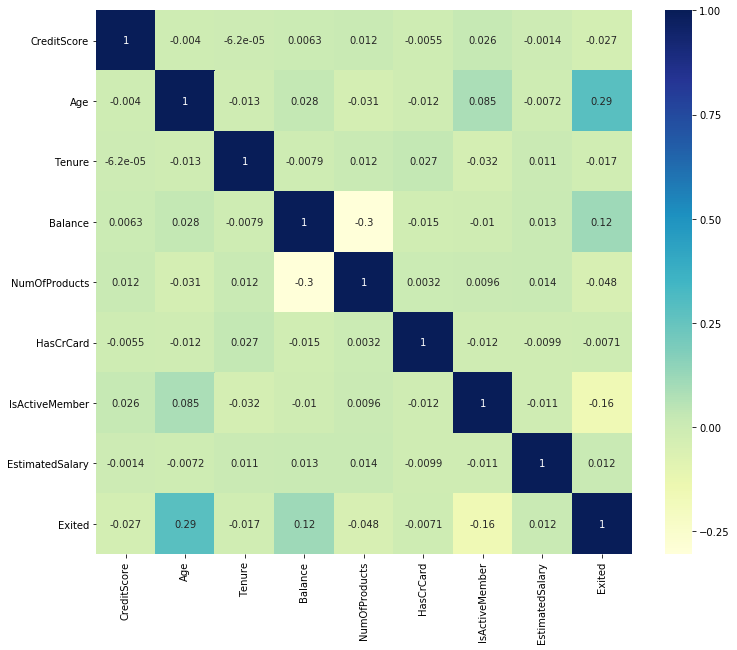

In [5]:
plt.subplots(figsize=(12,10))
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [6]:
def hist_show(df, col, target_feature, bins=30):
    ax = df[df[target_feature]==1].plot(kind='hist', histtype = 'step', y=col, color = 'red', alpha = 0.5, bins = bins, figsize=(8,6), linewidth = 2, density=True)
    df[df[target_feature]==0].plot(kind='hist', histtype = 'step', y=col, color='green', ax=ax, alpha = 0.5, bins = bins, linewidth = 2, density=True)
    ax.legend([target_feature+' = 1, '+col,target_feature+' = 0, '+col])

Создадим списки с категориальными и количественными признаками

In [7]:
numeric_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
categorical_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
target_col = 'Exited'

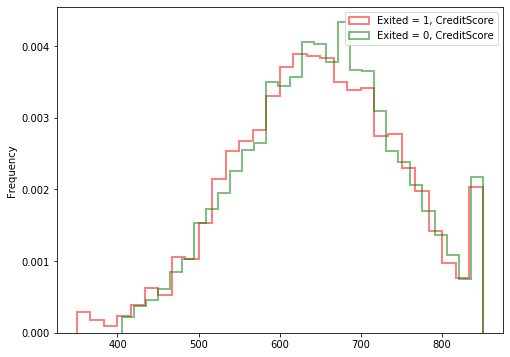

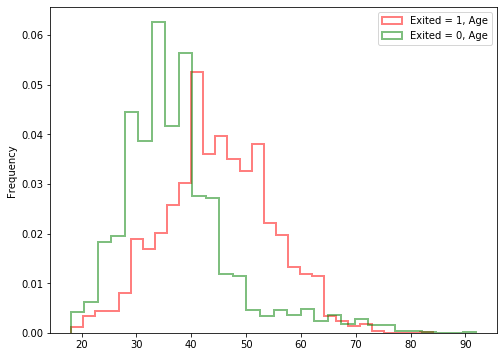

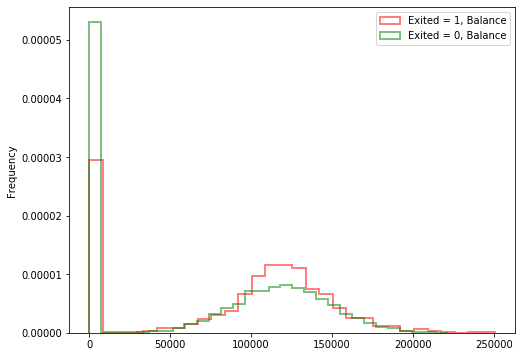

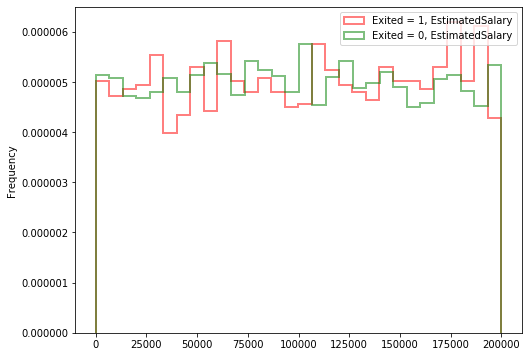

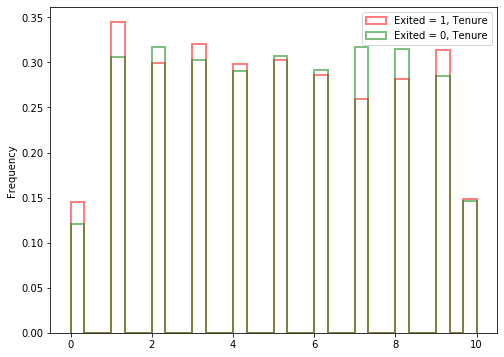

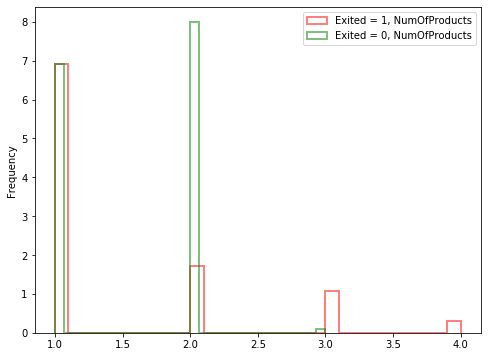

In [8]:
for col in numeric_col:
    hist_show(df, col, target_col)

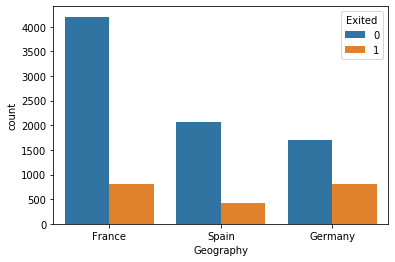

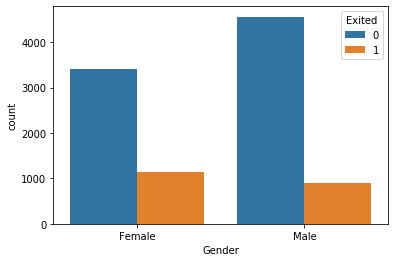

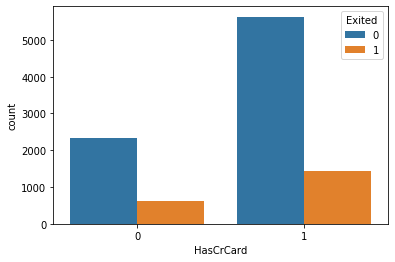

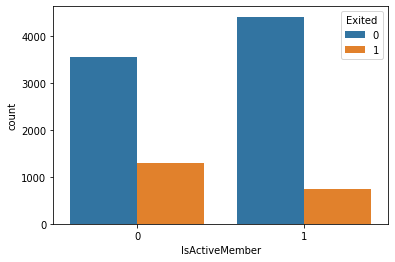

In [9]:
for col in categorical_col:
    sb.countplot(data=df, x=col, hue=target_col)
    plt.show()


Судя по близкому к равномерному распределению по признаку 'Tenure' для обоих значений целевого признака, есть подозрение, что признак Tenure не поможет нам при обучении модели. Заполним пропуски случайным значением для избежания перекоса данных.

In [10]:
np.random.seed(42)
df['Tenure'] = df['Tenure'].fillna(pd.Series(np.random.randint(0, 11, 10000)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [11]:
objects_count = df.shape[0]
objects_count_1 = df[df[target_col]==1].shape[0]
objects_count_0 = df[df[target_col]==0].shape[0]
print('Объекты класса 1 ', objects_count_1, 'объектов, что составляет', round(100*objects_count_1/objects_count,2), '% от общей выборки')
print('Объекты класса 0 ', objects_count_0, 'объектов, что составляет', round(100*objects_count_0/objects_count,2), '% от общей выборки')

Объекты класса 1  2037 объектов, что составляет 20.37 % от общей выборки
Объекты класса 0  7963 объектов, что составляет 79.63 % от общей выборки


### Подготовка данных

Прямое кодирование категориальных переменных

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Исходные данные необходимо разбить на 3 выборки:    
- Обучающую (train)
- Валидационную (valid)    
- Тестовую (test)    
Обучающая выборка используется для обучения модели, валидационная выборка необходима для подбора гиперпараметров модели и позволяет бороться с переобучением. Тестовая выборка используется для проверки качества полученной модели, отобранной на валидационной выборке.    
основное требование к тестовой выборки - она не должна никоим образом использоваться на этапе обучения и валидации модели, иначе полученные результаты будут некорректными.    
Существуют разные подходы к пропорциям разбиения исходных данных: известный популяризатор машинного обучения, профессор Стэнфордского университета Andrew Ng на своих курсах рекомендует пропорцию 70-15-15, на курсе Яндекс.практикум рекомендуют разбиение 60-20-20.   
Воспользуемся в данной работе пропорцией 60-20-20, но добавим возможность задавать требуемое значение по необходимости.    
Для обеспечения повторяемости результатов исследования зададим random_state = 12345

In [13]:
#параметры разбиения выборки
test_size=0.2
rnd_state=12345

features = df.drop('Exited', axis=1)
target = df['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=2*test_size, random_state=rnd_state)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=rnd_state)
print('Выполнено разбиение:') 
print('Размер обучающей выборки =', len(target_train))
print('Размер валидационной выборки =', len(target_valid))
print('Размер тестовой выборки =', len(target_test))

Выполнено разбиение:
Размер обучающей выборки = 6000
Размер валидационной выборки = 2000
Размер тестовой выборки = 2000


Проведем масштабирование количественных признаков

In [14]:
scaler = StandardScaler()
scaler.fit(features_train[numeric_col])
features_train.loc[:,numeric_col] = scaler.transform(features_train[numeric_col])
features_valid.loc[:,numeric_col] = scaler.transform(features_valid[numeric_col])
features_test.loc[:,numeric_col] = scaler.transform(features_test[numeric_col])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Выводы
- Данные из файла Churn.csv загружены в dataframe с именем df.      
- Набор данных состоит из 14 колонок и 10000 записей (объектов).      
- Дубликаты в исходных данных отсутствуют.  
- Признаки RowNumber, CustomerId и Surname удалены, т.к. не будут использоваться для классификации. 
- Объекты по целевому признаку в исходной выборке разделены в соотношении 1 к 4, т.е. наблюдается перекос в исходных данных.  
- Проведено прямое кодирование категориальных переменных.   
- Исходная выборка разбита на обучающую, валидационную и тестовую выборки в пропорции 60-20-20.
- Проведено масштабирование количественных признаков.

## Исследование задачи

В качестве моделей для бинарной классификации используем логистическую регрессию, дерево решений и случайный лес.
Заранее можно предположить, что случайный лес должен показать лучшие результаты исходя из того что эта модель более сложная и лучше может уловить зависимости в исходных данных - тут главное не переобучить, поэтому будем настраивать гиперпараметры моделей по валидационной выборке.

### Логистическая регрессия

Предварительно проанализировав работу метода, в качестве настраиваемого гиперпараметра, который может повлиять на accuracy используем solver (метод поиска оптимальных коэффициентов).

In [15]:
def logistic_regression(features_train, features_valid, target_train, target_valid, class_weight=None):
    best_model_f1 = None
    best_f1 = 0
    best_model_roc_auc = None
    best_roc_auc = 0
    for solver in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
        model = LogisticRegression(random_state=rnd_state, solver=solver, max_iter=5000, class_weight=class_weight)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_model_f1 = model
            best_f1 = f1
            
        roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
        if roc_auc > best_roc_auc:
            best_model_roc_auc = model
            best_roc_auc = roc_auc
            
    print("LogisticRegression")
    print("--------------------------------------------")
    print("f1_score наилучшей модели на валидационной выборке:", best_f1.round(3))
    print(best_model_f1)
    print("--------------------------------------------")
    print("ROC_AUC наилучшей модели на валидационной выборке:", best_roc_auc.round(3))
    print(best_model_roc_auc)
    print("--------------------------------------------")
    

In [16]:
logistic_regression(features_train, features_valid, target_train, target_valid)

LogisticRegression
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.334
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.759
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------


### Дерево решений

В качестве гиперпараметров модели будем использовать:    
- criterion {gini, entropy} - функция для измерения качества разбиения    
- splitter{'best', 'random'} - стратегия разбиения узлов    
- max_depth - максимальная глубина дерева
- min_samples_split - минимальное количество объектов для разбиения узла

In [17]:
def decision_tree_classifier(features_train, features_valid, target_train, target_valid, class_weight=None):
    best_model_f1 = None
    best_f1 = 0
    best_model_roc_auc = None
    best_roc_auc = 0
                
    for criterion in {'gini', 'entropy'}:
        for splitter in {'best', 'random'}:
            for max_depth in range(2, 20, 1):
                for min_samples_split in range(2, 10):
                    model = DecisionTreeClassifier(random_state=rnd_state, criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, class_weight=class_weight)
                    model.fit(features_train,target_train)
                    
                    predicted_valid = model.predict(features_valid)
        
                    f1 = f1_score(target_valid, predicted_valid)
                    if f1 > best_f1:
                        best_model_f1 = model
                        best_f1 = f1
            
                    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
                    if roc_auc > best_roc_auc:
                        best_model_roc_auc = model
                        best_roc_auc = roc_auc
            
    print("DecisionTreeClassifier")
    print("--------------------------------------------")
    print("f1_score наилучшей модели на валидационной выборке:", best_f1.round(3))
    print(best_model_f1)
    print("--------------------------------------------")
    print("ROC_AUC наилучшей модели на валидационной выборке:", best_roc_auc.round(3))
    print(best_model_roc_auc)
    print("--------------------------------------------")

In [18]:
decision_tree_classifier(features_train, features_valid, target_train, target_valid)

DecisionTreeClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.585
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='random')
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.834
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       

### Случайный лес

В качестве гиперпараметров модели будем использовать:    
- criterion {gini, entropy} - функция для измерения качества разбиения    
- n_estimators - количество деревьев в лесу    
- max_depth - максимальная глубина дерева
- min_samples_split - минимальное количество объектов для разбиения узла

In [19]:
def random_forest_classifier(features_train, features_valid, target_train, target_valid, class_weight=None):
    best_model_f1 = None
    best_f1 = 0
    best_model_roc_auc = None
    best_roc_auc = 0
                
    #for max_depth in tqdm(range(1, 15, 1)):
        #for n_estimators in range(10, 110, 10):
            #for criterion in {'gini', 'entropy'}:
    for max_depth in tqdm(range(10, 15, 1)):
        for n_estimators in range(10, 50, 10):
            for criterion in {'gini'}:
                for min_samples_split in range(2, 5, 1):
                    model = RandomForestClassifier(random_state=rnd_state, criterion=criterion, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, class_weight=class_weight)
                    model.fit(features_train,target_train)
                    
                    predicted_valid = model.predict(features_valid)
        
                    f1 = f1_score(target_valid, predicted_valid)
                    if f1 > best_f1:
                        best_model_f1 = model
                        best_f1 = f1
            
                    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
                    if roc_auc > best_roc_auc:
                        best_model_roc_auc = model
                        best_roc_auc = roc_auc
            
    print("RandomForestClassifier")
    print("--------------------------------------------")
    print("f1_score наилучшей модели на валидационной выборке:", best_f1.round(3))
    print(best_model_f1)
    print("--------------------------------------------")
    print("ROC_AUC наилучшей модели на валидационной выборке:", best_roc_auc.round(3))
    print(best_model_roc_auc)
    print("--------------------------------------------")

In [20]:
random_forest_classifier(features_train, features_valid, target_train, target_valid)

100%|██████████| 5/5 [00:14<00:00,  2.88s/it]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.597
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.852
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sample

f1-score на валидационной выборке достиг нужного значения без борьбы с дисбаллансом классов.  
Проверим модель на тестовых данных.

In [21]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

model.fit(features_train,target_train)
predicted_test = model.predict(features_test)
        
f1 = f1_score(target_test, predicted_test)
roc_auc = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])
            
print("RandomForestClassifier")
print("f1_score наилучшей модели на тестовой выборке:", f1.round(2))
print("ROC_AUC наилучшей модели на тестовой выборке:", roc_auc.round(2))

RandomForestClassifier
f1_score наилучшей модели на тестовой выборке: 0.54
ROC_AUC наилучшей модели на тестовой выборке: 0.84


Предсказуемо, результаты на тестовых данных хуже чем на валидационных и нужного значения F1_score мы не достигли. Придется все-таки бороться с дисбаллансом классов.

### Выводы

- Исследованы три модели машинного обучения для классификации: логистическая регрессия, дерево решений и случайный лес. Проведена настройка гиперпараметров моделей для подбора параметров с максимальным значением f1_score, auc_score на валидационной выборке.    
- Наилучшие результаты f1_score = 0.6, roc_auc_score = 0.84 получены для модели RandomForestClassifier со следующими параметрами:
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
                       
- Предсказуемо, результаты на тестовых данных оказались хуже чем на валидационных и нужного значения F1_score мы не достигли. Будем бороться с дисбаллансом классов.
 

## Борьба с дисбалансом

С дисбаллансом можно бороться тремя методами:  
- Использование при обучении параметра (class_weight='balanced')
- Upsampling
- Downsampling  

Протестируем все три метода и выберем метод, который лучше работает на наших данных

### Использование при обучении параметра (class_weight='balanced')

In [22]:
logistic_regression(features_train, features_valid, target_train, target_valid, class_weight='balanced')

LogisticRegression
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.487
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.764
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
--------------------------------------------


In [23]:
decision_tree_classifier(features_train, features_valid, target_train, target_valid, class_weight='balanced')

DecisionTreeClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.598
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.837
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
        

In [24]:
random_forest_classifier(features_train, features_valid, target_train, target_valid, class_weight='balanced')

100%|██████████| 5/5 [00:15<00:00,  3.10s/it]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.622
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.849
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1

Как мы видим - результаты улучшились, проверим еще два метода борьбы с дисбаллансом и выберем лучшую на валидационной выборке модель

### Upsampling

Определим вспомогательную функцию для формирования выборок

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rnd_state)
    
    return features_upsampled, target_upsampled

В цикле по параметру repeat вызовем функцию обуччения для каждой из моделей

In [26]:
for repeat in range(3,6):
    print('<<<<<<<<<< REPEAT = ', repeat, '>>>>>>>>>>')
    features_train_balanced, target_train_balanced = upsample(features_train, target_train, repeat)
    logistic_regression(features_train_balanced, features_valid, target_train_balanced, target_valid)
    print()

<<<<<<<<<< REPEAT =  3 >>>>>>>>>>
LogisticRegression
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.498
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.763
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------

<<<<<<<<<< REPEAT =  4 >>>>>>>>>>
Logisti

In [27]:
for repeat in range(3,6):
    print('<<<<<<<<<< REPEAT = ', repeat, '>>>>>>>>>>')
    features_train_balanced, target_train_balanced = upsample(features_train, target_train, repeat)
    decision_tree_classifier(features_train_balanced, features_valid, target_train_balanced, target_valid)
    print()

<<<<<<<<<< REPEAT =  3 >>>>>>>>>>
DecisionTreeClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.61
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='random')
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.834
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, pre

In [28]:
for repeat in range(3,6):
    print('<<<<<<<<<< REPEAT = ', repeat, '>>>>>>>>>>')
    features_train_balanced, target_train_balanced = upsample(features_train, target_train, repeat)
    random_forest_classifier(features_train_balanced, features_valid, target_train_balanced, target_valid)
    print()

  0%|          | 0/5 [00:00<?, ?it/s]

<<<<<<<<<< REPEAT =  3 >>>>>>>>>>


  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.631
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.85
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples

  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.625
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.85
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples

100%|██████████| 5/5 [00:21<00:00,  4.36s/it]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.618
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.848
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sample

### Downsampling

Определим вспомогательную функцию для формирования выборок

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=rnd_state)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=rnd_state)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=rnd_state)
    
    return features_downsampled, target_downsampled

In [30]:
for fraction in np.arange(0.2,0.45,0.05):
    print('<<<<<<<<<< FRACTION = ', fraction, '>>>>>>>>>>')
    features_train_balanced, target_train_balanced = downsample(features_train, target_train, fraction)
    logistic_regression(features_train_balanced, features_valid, target_train_balanced, target_valid)
    print()

<<<<<<<<<< FRACTION =  0.2 >>>>>>>>>>
LogisticRegression
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.48
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.763
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
--------------------------------------------

<<<<<<<<<< FRACTION =  0.25 >

In [31]:
for fraction in np.arange(0.2,0.45,0.05):
    print('<<<<<<<<<< FRACTION = ', fraction, '>>>>>>>>>>')
    features_train_balanced, target_train_balanced = downsample(features_train, target_train, fraction)
    decision_tree_classifier(features_train_balanced, features_valid, target_train_balanced, target_valid)
    print()

<<<<<<<<<< FRACTION =  0.2 >>>>>>>>>>
DecisionTreeClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.58
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.831
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0

In [32]:
for fraction in np.arange(0.2,0.45,0.05):
    print('<<<<<<<<<< FRACTION = ', fraction, '>>>>>>>>>>')
    features_train_balanced, target_train_balanced = downsample(features_train, target_train, fraction)
    random_forest_classifier(features_train_balanced, features_valid, target_train_balanced, target_valid)
    print()

  0%|          | 0/5 [00:00<?, ?it/s]

<<<<<<<<<< FRACTION =  0.2 >>>>>>>>>>


  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.575
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.843
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sample

  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.59
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.847
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples

  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.609
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.847
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sample

  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.625
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.847
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sample

100%|██████████| 5/5 [00:09<00:00,  1.93s/it]

RandomForestClassifier
--------------------------------------------
f1_score наилучшей модели на валидационной выборке: 0.634
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
--------------------------------------------
ROC_AUC наилучшей модели на валидационной выборке: 0.846
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sample

### Выводы

Проверены 3 метода борьбы с дисбаллансом классов:  
- Использование при обучении параметра (class_weight='balanced')
- Upsampling
- Downsampling  
- Исследованы три модели машинного обучения для классификации: логистическая регрессия, дерево решений и случайный лес. Проведена настройка гиперпараметров моделей для подбора параметров с максимальным значением f1_score, auc_score на валидационной выборке.    

Выберем две лучшие модели для проверки на тестовой выборке. Лучшие показатели для f1_score и roc_auc получены для разных гиперпараметров моделей, но поскольку целевой показатель в заданиее f1_score, то при выборе моделей для тестирования будем ориентироваться впервую очередь на него.
Модели для тестирования на тестовой выборке:
- f1_score = 0.631, upsampling с параметром repeat=3, модель RandomForestClassifier со следующими параметрами:
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

- f1_score = 0.634, downsampling с параметром fraction=0.4, модель RandomForestClassifier со следующими параметрами:
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

## Тестирование модели

На предыдущем этапе исследования выбраны две модели для проверки на тестовой выборке:
- f1_score = 0.631, upsampling с параметром repeat=3, модель RandomForestClassifier со следующими параметрами:
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

- f1_score = 0.634, downsampling с параметром fraction=0.4, модель RandomForestClassifier со следующими параметрами:
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [33]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                 max_depth=11, max_features='auto', max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=20,
                 n_jobs=None, oob_score=False, random_state=12345,
                 verbose=0, warm_start=False)

features_train_balanced, target_train_balanced = upsample(features_train, target_train, 3)

model.fit(features_train_balanced,target_train_balanced)

predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
            
print("RandomForestClassifier")
print("f1_score модели на валидационной выборке:", f1.round(3))
print("ROC_AUC модели на валидационной выборке:", roc_auc.round(3))

predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
roc_auc = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])
            
print("RandomForestClassifier")
print("f1_score модели на тестовой выборке:", f1.round(3))
print("ROC_AUC модели на тестовой выборке:", roc_auc.round(3))

RandomForestClassifier
f1_score модели на валидационной выборке: 0.631
ROC_AUC модели на валидационной выборке: 0.846
RandomForestClassifier
f1_score модели на тестовой выборке: 0.6
ROC_AUC модели на тестовой выборке: 0.854


RandomForestClassifier
f1_score модели на валидационной выборке: 0.634
ROC_AUC модели на валидационной выборке: 0.846
RandomForestClassifier
f1_score модели на тестовой выборке: 0.603
ROC_AUC модели на тестовой выборке: 0.852
                   feature_importance
CreditScore                  0.092107
Age                          0.321542
Tenure                       0.053726
Balance                      0.118831
NumOfProducts                0.168110
HasCrCard                    0.014110
IsActiveMember               0.057583
EstimatedSalary              0.084287
Geography_Germany            0.055279
Geography_Spain              0.009922
Gender_Male                  0.024503


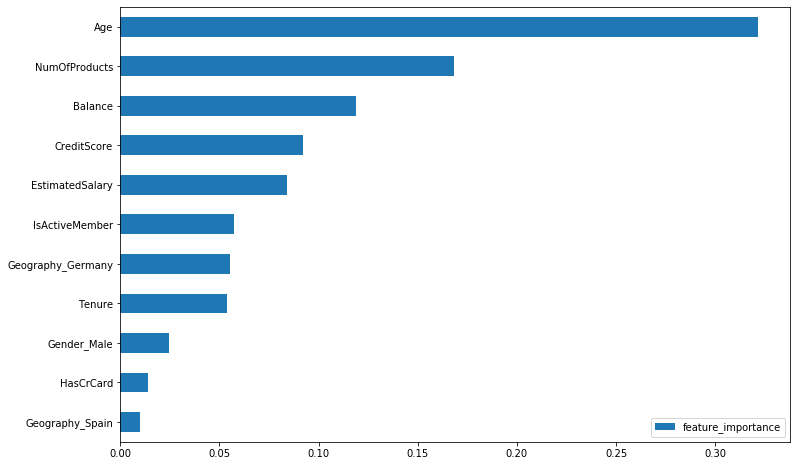

In [45]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                 max_depth=10, max_features='auto', max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=4,
                 min_weight_fraction_leaf=0.0, n_estimators=40,
                 n_jobs=None, oob_score=False, random_state=12345,
                 verbose=0, warm_start=False)

features_train_balanced, target_train_balanced = downsample(features_train, target_train, 0.4)

model.fit(features_train_balanced,target_train_balanced)

predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
            
print("RandomForestClassifier")
print("f1_score модели на валидационной выборке:", f1.round(3))
print("ROC_AUC модели на валидационной выборке:", roc_auc.round(3))

predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
roc_auc = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])
            
print("RandomForestClassifier")
print("f1_score модели на тестовой выборке:", f1.round(3))
print("ROC_AUC модели на тестовой выборке:", roc_auc.round(3))


feature_importances=pd.DataFrame({'feature_importance':model.feature_importances_}, index=features_train_balanced.columns)
print(feature_importances)
feature_importances.sort_values('feature_importance',ascending=True).plot(kind='barh', figsize=(12,8))

### Выводы

- Наилучшие результаты на тестовой выборке (f1_score = 0.603, roc_auc_score = 0.852) получены для модели RandomForestClassifier со следующими параметрами:  
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

## Общий вывод по проекту

**При выполнении проекта:**

На этапе подготовки данных
- Данные из файла Churn.csv загружены в dataframe с именем df.      
- Набор данных состоит из 14 колонок и 10000 записей (объектов).      
- Дубликаты в исходных данных отсутствуют.  
- Признаки RowNumber, CustomerId и Surname удалены, т.к. не будут использоваться для классификации. 
- Объекты по целевому признаку в исходной выборке разделены в соотношении 1 к 4, т.е. наблюдается перекос в исходных данных.  
- Проведено прямое кодирование категориальных переменных.   
- Исходная выборка разбита на обучающую, валидационную и тестовую выборки в пропорции 60-20-20.
- Проведено масштабирование количественных признаков.

На этапе исследования задачи:  
- Исследованы три модели машинного обучения для классификации: логистическая регрессия, дерево решений и случайный лес. Проведена настройка гиперпараметров моделей для подбора параметров с максимальным значением f1_score, auc_score на валидационной выборке.    
- Наилучшие результаты f1_score = 0.6, roc_auc_score = 0.84 получены для модели RandomForestClassifier со следующими параметрами:
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
                       
- Предсказуемо, результаты на тестовых данных оказались хуже чем на валидационных и нужного значения F1_score мы не достигли. Будем бороться с дисбаллансом классов.

На этапе борьбы с дисбаллансом:
Проверены 3 метода борьбы с дисбаллансом классов:  
- Использование при обучении параметра (class_weight='balanced')
- Upsampling
- Downsampling  
- Исследованы три модели машинного обучения для классификации: логистическая регрессия, дерево решений и случайный лес. Проведена настройка гиперпараметров моделей для подбора параметров с максимальным значением f1_score, auc_score на валидационной выборке.    
- Выбраны две лучшие модели для проверки на тестовой выборке. Лучшие показатели для f1_score и roc_auc получены для разных гиперпараметров моделей, но поскольку целевой показатель в заданиее f1_score, то при выборе моделей для тестирования будем ориентироваться впервую очередь на него.

На этапе тестирования модели:  
- Наилучшие результаты на тестовой выборке (f1_score = 0.603, auc_score = 0.852) получены для модели RandomForestClassifier со следующими параметрами:  
       RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
                       
Наиболее важными факторами оказались возраст, количество продуктов, баланс, кредитный рейтинг, зарплата. 
    По гистограммам можно было предположить влияние возраста и количества продуктов, по коэффициенту корреляции можно было выделить возраст и баланс. Но значимость остальных факторов не очевидна на этапе предварительного анализа данных.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*